In [193]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [194]:
address = '/Users/liuyang/Documents/Spring 2018/MIS 587/homework3/Movie dataset.csv'
dataset = pd.read_csv(address)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 13 columns):
Movie                  231 non-null object
Year                   231 non-null float64
Ratings                231 non-null float64
Genre                  231 non-null float64
Gross                  231 non-null float64
Budget                 230 non-null float64
Sequel                 231 non-null float64
Sentiment              231 non-null float64
Views                  231 non-null float64
Likes                  231 non-null float64
Dislikes               231 non-null float64
Comments               231 non-null float64
Aggregate Followers    196 non-null float64
dtypes: float64(12), object(1)
memory usage: 23.6+ KB


In [176]:
#dataset = dataset.fillna(value=0)
#dataset.info()


In [195]:
dataset = dataset.replace([np.inf, -np.inf], np.nan).dropna()
dataset.info()
x = dataset.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 216
Data columns (total 13 columns):
Movie                  195 non-null object
Year                   195 non-null float64
Ratings                195 non-null float64
Genre                  195 non-null float64
Gross                  195 non-null float64
Budget                 195 non-null float64
Sequel                 195 non-null float64
Sentiment              195 non-null float64
Views                  195 non-null float64
Likes                  195 non-null float64
Dislikes               195 non-null float64
Comments               195 non-null float64
Aggregate Followers    195 non-null float64
dtypes: float64(12), object(1)
memory usage: 21.3+ KB


Implement 'The elbow method' on the movie dataset. The elbow method allows us to pick the optimum amount of clusters for classification. although we already know the answer is 3 it is still interesting to run.

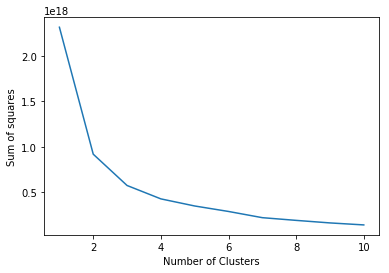

In [202]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
#plt.title('Metodo del codo')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squares') #within cluster sum of squares
plt.savefig('/Users/liuyang/Documents/Spring 2018/MIS 587/homework3/cluster_all.png', bbox_inches = 'tight')


The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. n_cluster = 3.

In [197]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

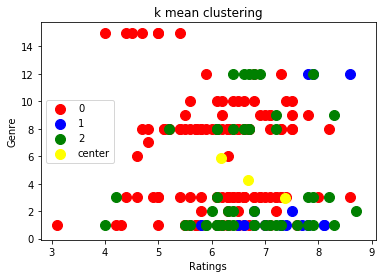

In [188]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], s = 100, c = 'red', label = '0')
plt.scatter(x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], s = 100, c = 'blue', label = '1')
plt.scatter(x[y_kmeans == 2, 1], x[y_kmeans == 2, 2], s = 100, c = 'green', label = '2')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], s = 100, c = 'yellow', label = 'center')
plt.legend()
plt.title('k mean clustering')
plt.xlabel('Ratings')
plt.ylabel('Genre') 
plt.savefig('/Users/liuyang/Documents/Spring 2018/MIS 587/homework3/kmeans_all.png', bbox_inches = 'tight')



In [198]:
y = dataset.iloc[:, [1, 2, 8, 9]].values

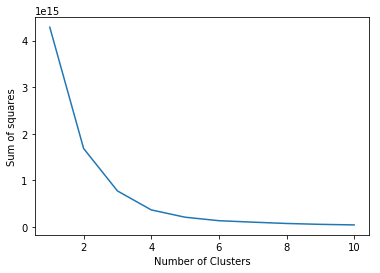

In [203]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(y)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
#plt.title('Metodo del codo')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squares') #within cluster sum of squares
plt.savefig('/Users/liuyang/Documents/Spring 2018/MIS 587/homework3/cluster1289.png', bbox_inches = 'tight')



In [200]:
kmeans = KMeans(n_clusters = 4)
y_kmeans = kmeans.fit_predict(y)
y_kmeans

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 3, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 3, 0, 2, 1, 1, 1, 0, 2, 1, 2, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int32)

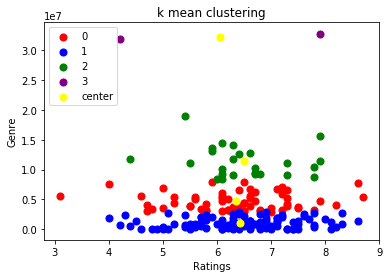

In [201]:
#Visualising the clusters
plt.scatter(y[y_kmeans == 0, 1], y[y_kmeans == 0, 2], s = 50, c = 'red', label = '0')
plt.scatter(y[y_kmeans == 1, 1], y[y_kmeans == 1, 2], s = 50, c = 'blue', label = '1')
plt.scatter(y[y_kmeans == 2, 1], y[y_kmeans == 2, 2], s = 50, c = 'green', label = '2')
plt.scatter(y[y_kmeans == 3, 1], y[y_kmeans == 3, 2], s = 50, c = 'purple', label = '3')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], s = 50, c = 'yellow', label = 'center')

plt.legend()
plt.title('k mean clustering')
plt.xlabel('Ratings')
plt.ylabel('Genre') 
plt.savefig('/Users/liuyang/Documents/Spring 2018/MIS 587/homework3/kmeans1289.png', bbox_inches = 'tight')


In [ ]:
#Future work includes using PCA to decrease dimensions of features, and then perform clustering